In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.shape

(550068, 12)

In [6]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
missing_per = train.isnull().sum() * 100 / len(train)
missing_file = pd.DataFrame({'Name': train.columns,
                                 'missing_percentage': missing_per})

In [11]:
missing_file

,Name,missing_percentage
User_ID,User_ID,0.000000
Product_ID,Product_ID,0.000000
Gender,Gender,0.000000
Age,Age,0.000000
Occupation,Occupation,0.000000
City_Category,City_Category,0.000000
Stay_In_Current_City_Years,Stay_In_Current_City_Years,0.000000
Marital_Status,Marital_Status,0.000000
Product_Category_1,Product_Category_1,0.000000
Product_Category_2,Product_Category_2,31.566643


Delete column Product_category_3 as around 70% of the data are missing from that column. That column wouldn't be helpful in the analysis, if 70% of the data is filled with mean or 0. Hence we need to delete that column.

In Product_Category_3 column around 30% of the data is missing. The missing values are replaced with 0.

In [12]:
train = train.fillna(0)
test = test.fillna(0)

In [13]:
train = train.drop(['Product_Category_3'], axis = 1)
test = test.drop(['Product_Category_3'], axis = 1)

In [14]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,7969


In [15]:
train['User_ID']

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: User_ID, Length: 550068, dtype: int64

# Analysis of columns

In [16]:
import matplotlib.pyplot as plt

In [17]:
train = train.drop((['Product_ID', 'User_ID']), axis = 1)
test = test.drop((['Product_ID', 'User_ID']), axis = 1)

In [18]:
train['Gender'].value_counts(normalize = True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

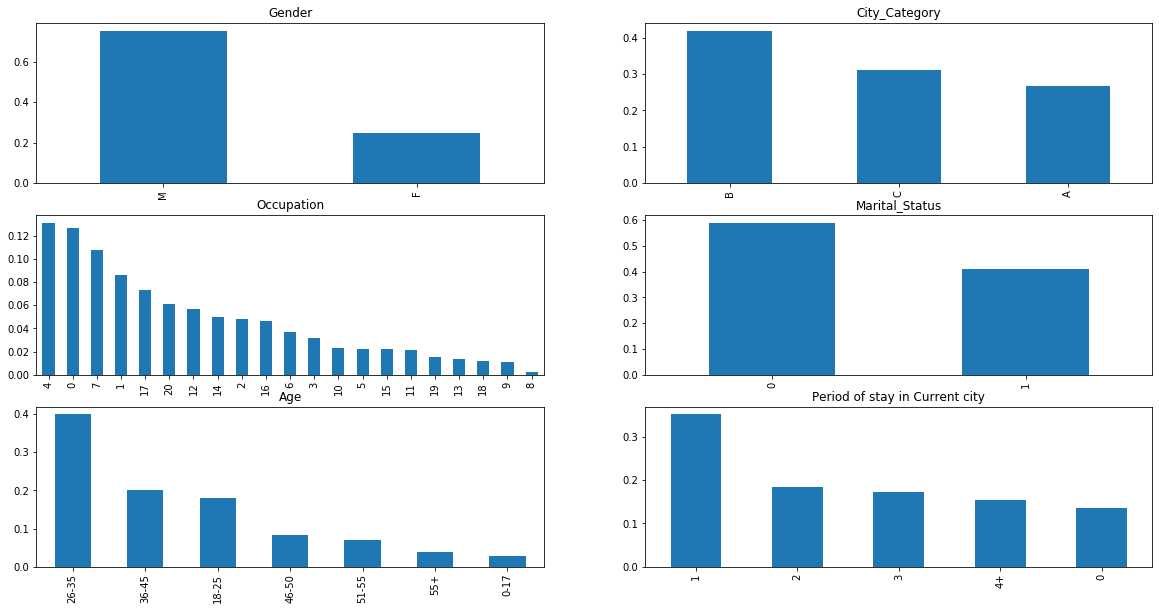

In [19]:
#plot the categorical variables

plt.figure(1) 
plt.subplot(321) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(322) 
train['City_Category'].value_counts(normalize=True).plot.bar(title= 'City_Category') 
plt.subplot(323) 
train['Occupation'].value_counts(normalize=True).plot.bar(title= 'Occupation') 
plt.subplot(324)
train['Marital_Status'].value_counts(normalize=True).plot.bar(title= 'Marital_Status') 
plt.subplot(325)
train['Age'].value_counts(normalize=True).plot.bar(title= 'Age') 
plt.subplot(326)
train['Stay_In_Current_City_Years'].value_counts(normalize=True).plot.bar(title= 'Period of stay in Current city') 
plt.show()

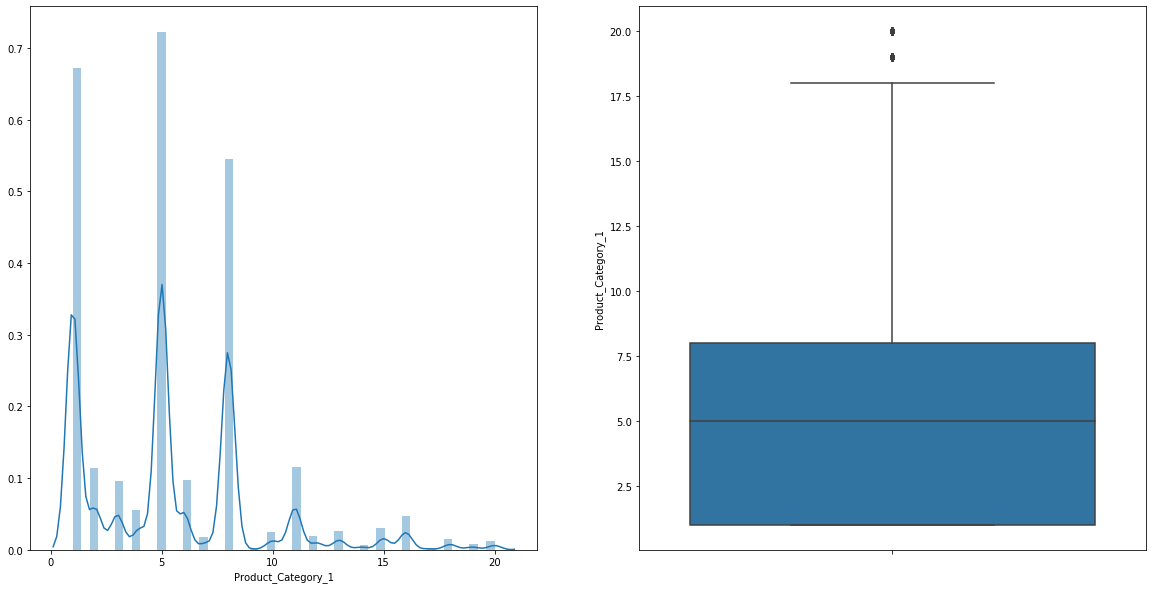

In [20]:
#plot the numerical values

import seaborn as sns
f, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(train['Product_Category_1'], ax = axes[0])
sns.boxplot(train['Product_Category_1'],orient='v',ax = axes[1])

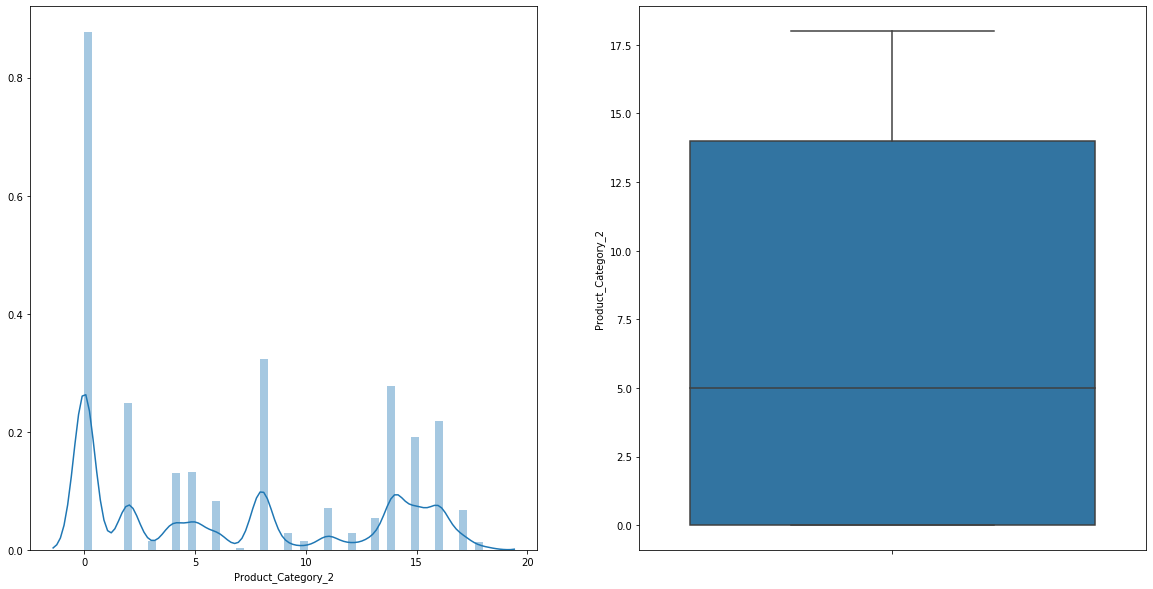

In [21]:
f, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(train['Product_Category_2'], ax = axes[0])
sns.boxplot(train['Product_Category_2'],orient='v',ax = axes[1])


# Bivariate Analysis

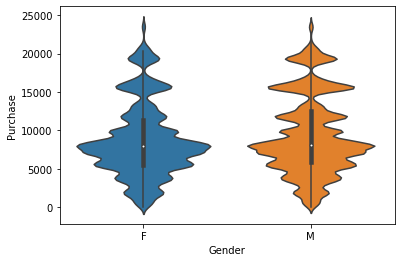

In [22]:
sns.violinplot(x = 'Gender', y = 'Purchase',data = train)

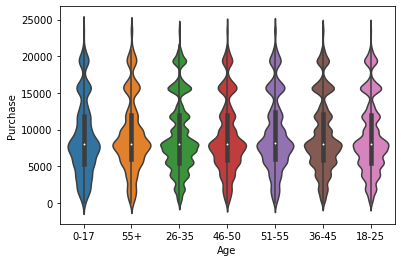

In [23]:
sns.violinplot(x = 'Age', y = 'Purchase',data = train )

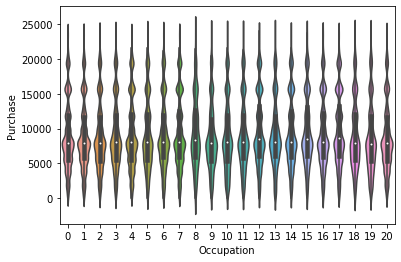

In [24]:
sns.violinplot(x = 'Occupation', y = 'Purchase',data = train )

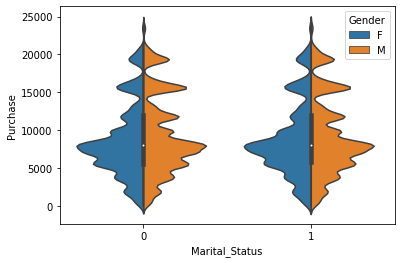

In [25]:
sns.violinplot(x= 'Marital_Status', y = 'Purchase', data = train, hue ='Gender', split = True)

# Preprocessing Data

In [26]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for i in cat_cols:
    en = LabelEncoder()
    train[i] = en.fit_transform(train[i])

for i in cat_cols:
    en = LabelEncoder()
    test[i] = en.fit_transform(test[i])
    

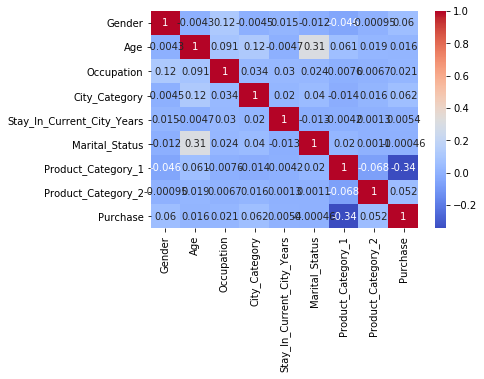

In [27]:
t = train.corr()
sns.heatmap(t,annot = True, cmap ='coolwarm')

# Building Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np

X = train.drop('Purchase', axis =1)
y = train['Purchase']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 111)

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

y_pred = model_lr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)

def model_details(model,name,X_train = X_train,y_train = y_train,X_test = X_test,y_test = y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    table = pd.DataFrame({'Model' :[name],
                          'MSE' :[mean_squared_error(y_test,y_pred)],
                          'RMSE' :[np.sqrt(mean_squared_error(y_test,y_pred))],
                          })

    return table

model_1 = model_details(model_lr, 'Linear Regression')

In [29]:
from sklearn.preprocessing import PolynomialFeatures


poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
model_lr_p = LinearRegression()
model_lr_p.fit(X_poly, y_train)

y_pred = model_lr_p.predict(X_poly_test)

MSE = mean_squared_error(y_pred,y_test)
RMSE = np.sqrt(MSE)

model_2 = pd.DataFrame({'Model':'Polynomial-2',
                 'MSE': [mean_squared_error(y_pred,y_test)],
                 'RMSE': [np.sqrt(mean_squared_error(y_pred,y_test))]})
model = model_1.append(model_2)


In [30]:
from sklearn.preprocessing import PolynomialFeatures


poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
model_lr_p = LinearRegression()
model_lr_p.fit(X_poly, y_train)

y_pred = model_lr_p.predict(X_poly_test)

MSE = mean_squared_error(y_pred,y_test)
RMSE = np.sqrt(MSE)

model_3 = pd.DataFrame({'Model':'Polynomial-3',
                 'MSE': [mean_squared_error(y_pred,y_test)],
                 'RMSE': [np.sqrt(mean_squared_error(y_pred,y_test))]})

model = model.append(model_3)

In [31]:
from sklearn.preprocessing import PolynomialFeatures


poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
model_lr_p = LinearRegression()
model_lr_p.fit(X_poly, y_train)

y_pred = model_lr_p.predict(X_poly_test)

MSE = mean_squared_error(y_pred,y_test)
RMSE = np.sqrt(MSE)

model_4 = pd.DataFrame({'Model':'Polynomial-4',
                 'MSE': [mean_squared_error(y_pred,y_test)],
                 'RMSE': [np.sqrt(mean_squared_error(y_pred,y_test))]})

model = model.append(model_4)

In [32]:
from sklearn.preprocessing import PolynomialFeatures


poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
model_lr_p = LinearRegression()
model_lr_p.fit(X_poly, y_train)

y_pred = model_lr_p.predict(X_poly_test)

MSE = mean_squared_error(y_pred,y_test)
RMSE = np.sqrt(MSE)

model_5 = pd.DataFrame({'Model':'Polynomial-5',
                 'MSE': [mean_squared_error(y_pred,y_test)],
                 'RMSE': [np.sqrt(mean_squared_error(y_pred,y_test))]})

model = model.append(model_5)

In [33]:
model

,Model,MSE,RMSE
0,Linear Regression,2.214279e+07,4705.612086
0,Polynomial-2,1.983759e+07,4453.940581
0,Polynomial-3,1.765089e+07,4201.296073
0,Polynomial-4,1.728411e+07,4157.415870
0,Polynomial-5,1.546302e+07,3932.305158
